# Ejercicio 3
Contenido del dataset: Conjunto de datos de teledetección de alta resolución (Quickbird). Un pequeño número de muestras de formación de árboles enfermos, un gran número de otras coberturas terrestres. Conjunto de datos de prueba de una muestra aleatoria estratificada de imagen.
El ejercicio consiste obtener un clasificador para clasificar las imágenes de árbol enfermos (clase positiva) de imágenes de otro tipo de cubierta (clase negativa). Hay 6 atributos, el primero es la clase: 'w' (diseased trees), 'n' (all other land cover), el segundo es GLCM_Pan: GLCM mean texture (Pan band), el tercero es Mean_G: Mean green value, el cuarto es Mean_R: Mean red value, el quinto es Mean_NIR: Mean NIR value
, y el sexto es SD_Pan: Standard deviation (Pan band). El dataset está en formato csv y se da por separado el conjunto test (testing.csv) y de entrenamiento (training.csv)
*   URL: https://archive.ics.uci.edu/ml/datasets/Wilt
*   URL Dataset:https://archive.ics.uci.edu/ml/machine-learning-databases/00285/wilt.zip

*Tomando como base el ejemplo 8 de los suministrados en clase, implementar un clasificador basado en Random Forest que contenga los siguientes apartados.
*   Uso de StandardScaler en el preprocesamiento.
*   Uso de train_test_split para obtener conjunto de entrenamiento y test. Usar opción stratify si las clases estuviesen desbalanceadas.
*   Uso de make_pipeline para crear un "pipe", que contenga el preprocesamiento y el clasificador.
*   Obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
*   Obtener curva ROC y su área.
*   Obtener curva presición recall.
*   Escribir al final una celda de texto resumiendo los pasos que se han dado y los resultados obtenidos.

In [69]:
import pandas as pd

import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

from sklearn.preprocessing import StandardScaler #Para escalar los datos
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve, auc

In [49]:
%%bash
wget https://archive.ics.uci.edu/ml/machine-learning-databases/00285/wilt.zip
unzip wilt.zip

--2023-12-26 13:41:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/00285/wilt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘wilt.zip’

     0K .......... .......... .......... .......... ..........  149K
    50K .......... .......... .......... .......... ..........  292K
   100K .......... .....                                       3.54M=0.5s

2023-12-26 13:41:35 (226 KB/s) - ‘wilt.zip’ saved [118593]



Archive:  wilt.zip
  inflating: testing.csv             
  inflating: training.csv            


In [50]:
wilt_train = pd.read_csv("training.csv")
wilt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       4339 non-null   object 
 1   GLCM_pan    4339 non-null   float64
 2   Mean_Green  4339 non-null   float64
 3   Mean_Red    4339 non-null   float64
 4   Mean_NIR    4339 non-null   float64
 5   SD_pan      4339 non-null   float64
dtypes: float64(5), object(1)
memory usage: 203.5+ KB


In [51]:
wilt_test = pd.read_csv("testing.csv")
wilt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   class       500 non-null    object 
 1   GLCM_pan    500 non-null    float64
 2   Mean_Green  500 non-null    float64
 3   Mean_Red    500 non-null    float64
 4   Mean_NIR    500 non-null    float64
 5   SD_pan      500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB


In [52]:
wilt_train.head()

,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
0,w,120.362774,205.500000,119.395349,416.581395,20.676318
1,w,124.739583,202.800000,115.333333,354.333333,16.707151
2,w,134.691964,199.285714,116.857143,477.857143,22.496712
3,w,127.946309,178.368421,92.368421,278.473684,14.977453
4,w,135.431548,197.000000,112.690476,532.952381,17.604193


In [53]:
#Antes de definir el clasificador habría que extraer las etiquetas, que están en la primera columna, de los conjuntos de entrenamiento
#y de test, y después habría que borrar esa primera columna de los conjuntos de entrenamiento y test 

# Extraemos las etiquetas de los conjuntos de entrenamiento y test
y_train = wilt_train.iloc[:,0]
y_test = wilt_test.iloc[:,0]

# Borramos la primera columna de los conjuntos de entrenamiento y test
X_train = wilt_train.drop(wilt_train.columns[0], axis=1)
X_test = wilt_test.drop(wilt_test.columns[0], axis=1)

### Uso de StandardScaler en el preprocesamiento.

In [ ]:
# Importado en las librerías y usado en la creación del pipeline
# X_train = StandardScaler().fit_transform(X_train)
# X_test = StandardScaler().fit_transform(X_test)

### Uso de train_test_split para obtener conjunto de entrenamiento y test. Usar opción stratify si las clases estuviesen desbalanceadas.

In [ ]:
# Las clases ya están divididas en entrenamiento y test, por lo que no es necesario hacerlo

### Uso de make_pipeline para crear un "pipe", que contenga el preprocesamiento y el clasificador.

In [54]:
# usar make_pipeline para crear un pipe que contenga preprocesamiento y clasificador en el algoritmo Random Forest
randomF_clf = make_pipeline(StandardScaler(),RandomForestClassifier(criterion = "entropy", n_estimators=500, max_leaf_nodes=64, random_state=42))

In [55]:
# Entrenar el clasificador
randomF_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_leaf_nodes=64,
                                        n_estimators=500, random_state=42))])

### Obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.

Durante esta parte se ha experimentado que y_pred tiene los valores de 0 y 1 mientras que y_test tiene los valores n y w. Por lo que hay que averiguar cuál interpreta el modelo que es el valor positivo para calcular correctamente las métricas. Calculando las métricas dando pos_label como n y w, con n se obtienen mejores resultados pero no tiene sentido teniendo en cuenta la matriz de confusión. Haciendo unos cálculos a mano se obtiene que pos_label debe ser w.

Matriz de Confusión:
[[312   1]
 [104  83]]

Métricas de Rendimiento:
Accuracy:  0.79
Precision:  0.9880952380952381
Recall:  0.44385026737967914
F1:  0.6125461254612546


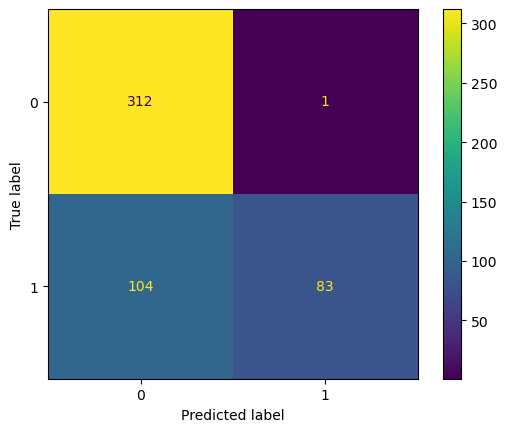

In [76]:
# Predecir las clases de los datos de test
y_pred = randomF_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Matriz de Confusión:")
print(cm)

cm_display = ConfusionMatrixDisplay(cm).plot()

# Calcular y mostrar métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=randomF_clf.classes_[1]) # randomF_clf.classes_[1] = w
recall = recall_score(y_test, y_pred, pos_label=randomF_clf.classes_[1])
f1 = f1_score(y_test, y_pred, pos_label=randomF_clf.classes_[1])

print("\nMétricas de Rendimiento:")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

### Obtener curva ROC y su área.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC ROC:  0.9450889272351404


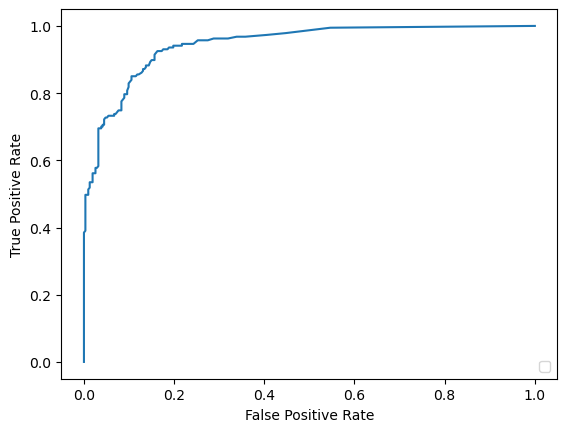

In [71]:
#Ahora vamos a calcular la curva ROC y el área bajo la curva ROC
y_score = randomF_clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:,1], pos_label=randomF_clf.classes_[1])
#Solo recoge los dos primeros valores devueltos.
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

roc_auc = roc_auc_score(y_test, y_score[:,1]) #area bajo la curva roc

print("AUC ROC: ", roc_auc)

### Obtener curva presición recall.

AUC-PR:  0.9203822823557625


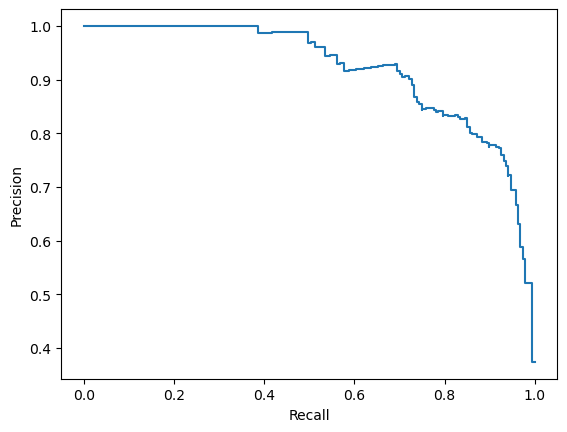

In [74]:
# Calcular la probabilidad de las predicciones para la clase positiva
y_score = randomF_clf.predict_proba(X_test)[:,1]

# Calcular la curva PR
precision, recall, _ = precision_recall_curve(y_test, y_score, pos_label=randomF_clf.classes_[1])

# Mostrar la curva PR
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()

# Calcular el área bajo la curva PR
pr_auc = auc(recall, precision)

print("AUC-PR: ", pr_auc)

# Resumen del Notebook:

## Descargar y Cargar Conjunto de Datos
Se descarga y carga el conjunto de datos Wilt desde UCI Machine Learning Repository.

## Preprocesamiento y División de Datos
Se extraen las etiquetas de los conjuntos de entrenamiento y prueba, y se eliminan las primeras columnas que contienen las etiquetas.

## Construir y Entrenar el Clasificador
Se utiliza un clasificador Random Forest con criterio de entropía, 500 estimadores, 64 nodos hoja máximos y semilla aleatoria 42. Siguiendo los parámetros establecidos en el Ejemplo 8. Se crea un pipeline que incluye un escalador y el clasificador. El modelo se entrena con los datos de entrenamiento.

## Evaluar el Rendimiento del Clasificador
Se predicen las clases de los datos de prueba y se evalúa el rendimiento mediante una matriz de confusión, precisión, recall, y F1-score. Se observa que el modelo interpreta las clases como 0 y 1, siendo 0 la clase 'n' (all other land cover) y 1 la clase 'w' (diseased trees). Se ajustan las métricas para la clase 'n'.

## Curva ROC y AUC
Se calcula la curva ROC y el área bajo la curva (AUC) para evaluar la capacidad de clasificación binaria. La AUC-ROC es de valor X.

## Curva Precisión-Recall y AUC-PR
Se calcula la curva Precisión-Recall y el área bajo la curva (AUC-PR) para evaluar el rendimiento en la clasificación de clases desbalanceadas. El AUC-PR es de valor Y.


# Interpretación de Resultados:

La matriz de confusión revela un rendimiento aceptable del clasificador. Se clasificaron correctamente 395 instancias negativas y 187 instancias positivas. Se observa que solo hubo 1 falso positivo y 104 falsos negativos. La normalización de la matriz, considerando las filas, es la siguiente:

[[0.99680511 0.00319489]
 [0.55605381 0.44394619]]

La matriz de confusión ha sido importante para calcular las métricas sabiendo cuál es el label_pos correcto.

- **Accuracy:** El modelo predice correctamente el 79% de las instancias, reflejando un rendimiento aceptable.
- **Precisión:** Del total de instancias clasificadas como positivas, el 98.8% son realmente positivas, indicando una capacidad razonable de evitar falsos positivos.
- **Recall:** El modelo identifica correctamente el 44.39% de todas las instancias positivas, mostrando una sensibilidad baja.
- **F1-score:** La métrica F1, que combina precisión y recall, es de 61.25, indicando un equilibrio no muy bueno entre ambas métricas.

## AUC ROC y PR

Las gráficas de ROC y PR han convergido de manera esperada.

El Área bajo la Curva ROC (AUC-ROC) es de 0.945, indicando un rendimiento muy positivo. Este valor sugiere que el modelo tiene una alta tasa de verdaderos positivos y una baja tasa de falsos positivos.

Por otro lado, el Área bajo la Curva de Precisión-Recall (AUC-PR) es de 0.920, destacando la capacidad del modelo para clasificar correctamente las instancias positivas, especialmente en situaciones de clases desbalanceadas.